# Explanation of the Birthday Paradox

The Birthday Paradox is a famous problem in probability theory that demonstrates how our intuition can be misleading when it comes to probabilities. The paradox states that in a group of just 23 people, there is a better than even chance (greater than 50%) that at least two people share the same birthday.

### Intuitive Explanation

1. **Total Possible Pairs**:
   - Consider a room with `n` people. The number of ways to choose 2 people out of `n` is given by the combination formula $ \binom{n}{2} = \frac{n(n-1)}{2} $. This is the number of unique pairs of people we can have.

2. **Probability of No Shared Birthdays**:
   - The probability that any two people do not share the same birthday is $ \frac{364}{365} $. This is because if one person has a birthday on a given day, there are 364 days left for the second person to have a different birthday.
   - For `n` people, we need to calculate the probability that all pairs do not share a birthday. This involves multiplying the probabilities for each pair.

3. **Complementary Probability**:
   - Instead of calculating the probability that at least two people share the same birthday directly, it is easier to calculate the complementary probability (i.e., the probability that no one shares a birthday) and subtract it from 1.
   - The probability that no one shares a birthday is the product of the probabilities for each new person added not sharing a birthday with those already in the group:
     - The first person has 365 options (all days).
     - The second person has 364 options out of 365 (one less than the first person).
     - The third person has 363 options out of 365, and so on.
     - Thus, the probability that no one shares a birthday is:
       $$ P(\text{no shared birthdays}) = \frac{365}{365} \times \frac{364}{365} \times \frac{363}{365} \times \cdots \times \frac{365 - n + 1}{365} $$
   - The probability that at least two people share a birthday is:
     $$ P(\text{at least one shared birthday}) = 1 - P(\text{no shared birthdays}) $$

### Mathematical Calculation

To illustrate, let's calculate this for 23 people:

1. Calculate the probability that no one shares a birthday:
   $$ P(\text{no shared birthdays}) = \frac{365}{365} \times \frac{364}{365} \times \frac{363}{365} \times \cdots \times \frac{343}{365} $$

2. Convert this into a more manageable formula:
   $$ P(\text{no shared birthdays}) = \prod_{i=0}^{n-1} \left( \frac{365 - i}{365} \right) $$

3. Finally, compute the probability that at least two people share a birthday:
   $$ P(\text{at least one shared birthday}) = 1 - P(\text{no shared birthdays}) $$

### Python Implementation

In [37]:
import math

def birthday_paradox_probability(num_people: int) -> float:
    """
    Calculate the probability that at least two people share the same birthday
    in a group of `num_people`.

    Parameters:
    num_people (int): The number of people in the group

    Returns:
    float: The probability that at least two people share a birthday
    """
    # If there are more than 365 people, the probability is 1 (100%)
    if num_people > 365:
        return 1.0

    # Calculate the probability that no one shares a birthday
    probability_no_shared_birthday = 1.0
    for i in range(num_people):
        probability_no_shared_birthday *= (365 - i) / 365

    # Calculate the probability that at least one shared birthday
    probability_shared_birthday = 1 - probability_no_shared_birthday

    return probability_shared_birthday

# Example usage
num_people = 10
probability = birthday_paradox_probability(num_people)
print(f"The probability that at least two people share a birthday in a group of {num_people} is: {probability:.4f}")

The probability that at least two people share a birthday in a group of 10 is: 0.1169


### Explanation of the Code

1. **Function Definition**:
   - The function `birthday_paradox_probability` takes the number of people as input and returns the probability that at least two people share the same birthday.

2. **Edge Case Handling**:
   - If the number of people exceeds 365, the probability is 1 because there are only 365 days in a year.

3. **Probability Calculation**:
   - Initialize `probability_no_shared_birthday` to 1.
   - For each person in the group, adjust the probability by multiplying it by $ \frac{365 - i}{365} $, where `i` is the index of the person in the loop.

4. **Final Probability**:
   - Subtract the probability that no one shares a birthday from 1 to get the probability that at least two people share a birthday.

This implementation provides an efficient way to calculate the probability using a simple loop and basic probability principles.

#  More Detail - only 2 people in the room

1. **First Person**: 
   - The first person can have a birthday on any day of the year. There are no restrictions, so the probability is 1 (100%).

2. **Second Person**:
   - The second person must have a birthday on a different day from the first person. There are 364 days out of the 365 that are not the same as the first person's birthday. Thus, the probability is \( \frac{364}{365} \).

The combined probability that both people have different birthdays is:
$$ P(\text{no shared birthday}) = 1 \times \frac{364}{365} = \frac{364}{365} $$

The probability that they share the same birthday is the complement of the probability that they do not share a birthday:
$$ P(\text{shared birthday}) = 1 - P(\text{no shared birthday}) = 1 - \frac{364}{365} = \frac{1}{365} $$

Therefore, you don't need to do it twice because the calculation already accounts for both people.

### Reiterating the Calculation

1. **Probability that the first person can have their birthday on any of the 365 days**:
   $$ P(\text{first person's birthday}) = 1 $$

2. **Probability that the second person does not share the first person's birthday**:
   $$ P(\text{second person different birthday}) = \frac{364}{365} $$

3. **Combined Probability that both people have different birthdays**:
   $$ P(\text{no shared birthday}) = 1 \times \frac{364}{365} = \frac{364}{365} $$

4. **Probability that both people share the same birthday**:
   $$ P(\text{shared birthday}) = 1 - \frac{364}{365} = \frac{1}{365} $$


# How does the probability grow with the number of people in the room?

<IPython.core.display.Javascript object>


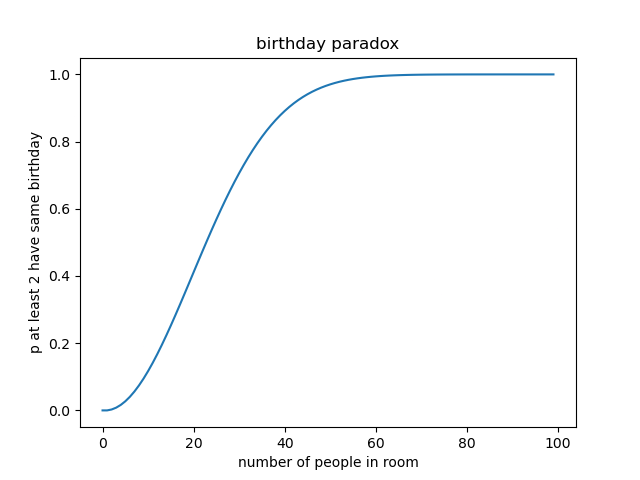

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

probabilties = []
for num_people in range(100):
    probabilties.append(birthday_paradox_probability(num_people))
    
plt.figure()
plt.plot(probabilties);
plt.title('birthday paradox')
plt.xlabel('number of people in room')
plt.ylabel('p at least 2 have same birthday');

# The probability reaches 50% around 23 people

In [9]:
birthday_paradox_probability(23)

0.5072972343239857

# So, what is the probability at least 2 people share a birthday on a particular day?

To find the probability that at least 2 people in a group have the same birthday on a particular day (say, January 1st), you can use a similar approach to the Birthday Paradox but with a focus on a specific day.

### Step-by-Step Calculation

1. **Total Possible Days**:
   - There are 365 days in a year.

2. **Probability that the First Person's Birthday is on the Particular Day**:
   - The first person can have their birthday on any of the 365 days. We don't need to consider this probability because we are focusing on the probability of at least one shared birthday on a specific day.

3. **Probability that Each Additional Person Does Not Have a Birthday on the Particular Day**:
   - The probability that one specific person does not have a birthday on January 1st is \( \frac{364}{365} \).

4. **Combined Probability for All `n` People**:
   - The probability that all `n` people do not have a birthday on January 1st is \( \left(\frac{364}{365}\right)^n \).

5. **Complementary Probability**:
   - The probability that at least one person has a birthday on January 1st is the complement of the above probability:
     $$ P(\text{at least one person has a birthday on Jan 1}) = 1 - \left(\frac{364}{365}\right)^n $$

6. **Probability of At Least Two People Sharing a Birthday on a Specific Day**:
   - For at least two people to have the same birthday on January 1st, it must first be true that at least one person has a birthday on that day, and then a second person must also have the same birthday.

Let's break this down further:

1. **Probability at least one person has a birthday on Jan 1st**:
   $$ P(\text{at least one person}) = 1 - \left(\frac{364}{365}\right)^n $$

2. **Probability of exactly one person having a birthday on Jan 1st**:
   $$ P(\text{exactly one person}) = n \cdot \frac{1}{365} \cdot \left(\frac{364}{365}\right)^{n-1} $$

3. **Probability of at least two people having a birthday on Jan 1st**:
   $$ P(\text{at least two people}) = P(\text{at least one person}) - P(\text{exactly one person}) $$
   $$ P(\text{at least two people}) = \left(1 - \left(\frac{364}{365}\right)^n\right) - n \cdot \frac{1}{365} \cdot \left(\frac{364}{365}\right)^{n-1} $$

### Python Implementation

Here’s the Python implementation to compute this:

In [13]:
def at_least_two_same_birthday_on_day(num_people: int) -> float:
    """
    Calculate the probability that at least two people have the same birthday on a particular day.

    Parameters:
    num_people (int): The number of people in the group

    Returns:
    float: The probability that at least two people share a birthday on a specific day
    """
    if num_people < 2:
        return 0.0

    # Probability that no one has a birthday on the particular day
    prob_no_one = (364 / 365) ** num_people

    # Probability that at least one person has a birthday on the particular day
    prob_at_least_one = 1 - prob_no_one

    # Probability that exactly one person has a birthday on the particular day
    prob_exactly_one = num_people * (1 / 365) * ((364 / 365) ** (num_people - 1))

    # Probability that at least two people have a birthday on the particular day
    prob_at_least_two = prob_at_least_one - prob_exactly_one

    return prob_at_least_two

# Example usage
num_people = 100
probability = at_least_two_same_birthday_on_day(num_people)
print(f"The probability that at least two people out of {num_people} share a birthday on a particular day is: {probability:.4f}")

The probability that at least two people out of 100 share a birthday on a particular day is: 0.0311


Running this code will give you the result for a group of 23 people. This example calculates the probability that at least two out of 23 people share a birthday on a particular day (e.g., January 1st).

This approach generalizes the problem to any number of people and any specific day, providing an exact probability for the scenario described.

<IPython.core.display.Javascript object>


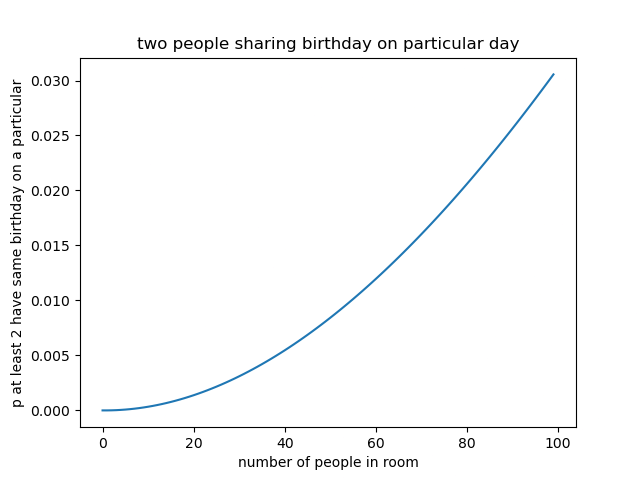

In [15]:
import matplotlib.pyplot as plt
%matplotlib notebook

probabilties = []
for num_people in range(100):
    probabilties.append(at_least_two_same_birthday_on_day(num_people))
    
plt.figure()
plt.plot(probabilties);
plt.title('two people sharing birthday on particular day')
plt.xlabel('number of people in room')
plt.ylabel('p at least 2 have same birthday on a particular');

Thinking about the Birthday Paradox in terms of symmetry can provide a deeper understanding of the problem. Symmetry, in this context, refers to the uniformity and indistinguishability of the days and people's birthdays. Here’s how symmetry plays a role:

# Symmetry in the Birthday Paradox

1. **Indistinguishability of Days**:
   - Each day of the year is equally likely to be someone's birthday. There is no inherent difference between January 1st and any other day. This uniform distribution is a key aspect of symmetry.

2. **Symmetric Grouping**:
   - When we consider groups of people, the arrangement or order in which we choose people doesn't matter; only the number of people matters. This symmetry simplifies the problem by reducing the number of distinct scenarios we need to consider.

3. **Symmetry in Probability Calculation**:
   - Because each person's birthday is equally likely on any day, the probability calculations for each person remain the same, regardless of the specific day chosen for their birthday. This means we can multiply probabilities for each additional person without worrying about which specific day they fall on.

### Conceptualizing the Problem with Symmetry

#### Step-by-Step Symmetric Analysis

1. **Initial Setup**:
   - Assume there are `n` people in a room. Each person's birthday is equally likely on any of the 365 days of the year.

2. **Symmetric Probability of No Shared Birthdays**:
   - The probability that the first person has a birthday on any day is 1.
   - The probability that the second person does not share the first person's birthday is \( \frac{364}{365} \).
   - The probability that the third person does not share the birthday with the first two people is \( \frac{363}{365} \), and so on.
   - These probabilities form a symmetric sequence because each additional person's probability only depends on the number of days left, not on the specific arrangement of the days.

3. **Combining Probabilities Symmetrically**:
   - The overall probability that all `n` people have different birthdays can be expressed as:
     $$ P(\text{no shared birthday}) = \prod_{i=0}^{n-1} \left( \frac{365 - i}{365} \right) $$
   - This product leverages the symmetry of the problem, where each term represents a symmetric decrement in the available days.

4. **Complementary Symmetric Probability**:
   - To find the probability that at least two people share a birthday, we use the complementary probability:
     $$ P(\text{at least one shared birthday}) = 1 - P(\text{no shared birthday}) $$

### Visualizing Symmetry

Imagine the birthdays as points on a circle (a year) with 365 equally spaced positions (days). Each person's birthday is a point on this circle. The symmetry arises from the fact that any two points are equally likely to coincide, irrespective of their positions.


# Birthday Paradox as a graph

Visualizing the Birthday Paradox as a graph with a circular layout where common birthdays share edges can be an effective way to illustrate the problem. In this visualization:

1. **Nodes**: Represent people.
2. **Circle**: Represents the 365 days of the year.
3. **Edges**: Connect nodes (people) who share the same birthday.

Here's how we can create such a visualization using Python and the `networkx` and `matplotlib` libraries:

### Python Implementation

First, we need to install the required libraries if they are not already installed:

```bash
pip install networkx matplotlib
```

Then, we can create the visualization as follows:

<IPython.core.display.Javascript object>


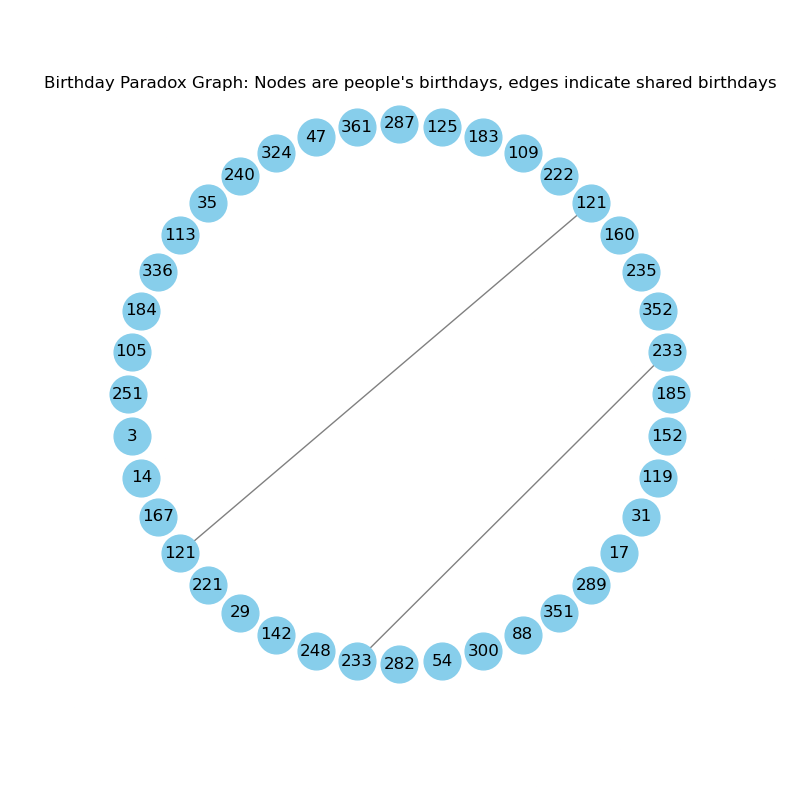

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_birthdays(num_people: int) -> list:
    """
    Generate a list of random birthdays for `num_people`.

    Parameters:
    num_people (int): The number of people

    Returns:
    list: A list of birthdays where each birthday is a day of the year (1 to 365)
    """
    return [random.randint(1, 365) for _ in range(num_people)]

def create_birthday_graph(birthdays: list) -> nx.Graph:
    """
    Create a graph where nodes represent people and edges represent shared birthdays.

    Parameters:
    birthdays (list): A list of birthdays

    Returns:
    nx.Graph: A graph with nodes and edges based on shared birthdays
    """
    G = nx.Graph()
    num_people = len(birthdays)
    for i in range(num_people):
        G.add_node(i, birthday=birthdays[i])

    for i in range(num_people):
        for j in range(i + 1, num_people):
            if birthdays[i] == birthdays[j]:
                G.add_edge(i, j)
    
    return G

def draw_birthday_graph(G: nx.Graph):
    """
    Draw the birthday graph with a circular layout.

    Parameters:
    G (nx.Graph): The birthday graph
    """
    pos = nx.circular_layout(G)
    labels = nx.get_node_attributes(G, 'birthday')

    fig, ax = plt.subplots(figsize=(8, 8))
    
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='skyblue', 
            node_size=700, edge_color='gray', labels=labels)
    ax.set_title('Birthday Paradox Graph: Nodes are people\'s birthdays, edges indicate shared birthdays')
    plt.show()

# Example usage
num_people = 40
birthdays = generate_birthdays(num_people)
G = create_birthday_graph(birthdays)
draw_birthday_graph(G)
